### Imports

In [5]:
import numpy as _np
import matplotlib.pyplot as _plt
import sys
import os
import pymad8 as _m8

# Add the parent folder to sys.path
parent_folder = os.path.abspath('..')
if parent_folder not in sys.path:
    sys.path.append(parent_folder)

# Import the module from the parent folder
import XFEL_BPM

### Date and prefix

In [6]:
date = "2025_01_22"
save_name_prefix = "plots/XFEL/Charge/" + date + "_XFEL_plot"

# Charge SVD

In [7]:
file = '../XFEL_data/BPM_data/reduced_matched_linac_main_run2148_file114155_20231120T155943.all.hdf5'

In [8]:
df = XFEL_BPM.getH5dataInDF(file, getCharge=True, getPosition=False)

Load reduced_matched_linac_main_run2148_file114155_20231120T155943.all.hdf5 | 49 bpms, 3391 trains, 9 bunches: |██████████████████████████████████████████████████| 100.0% Complete


In [9]:
df

Valid            S        Charge
BPM          TrainID    BunchID                                  
BPMI.1860.TL 1857289827 0          1.0  1838.149255  2.406533e-10
                        1          1.0  1838.149255  2.385055e-10
                        2          1.0  1838.149255  2.381080e-10
                        3          1.0  1838.149255  2.423331e-10
                        4          1.0  1838.149255  2.424164e-10
...                                ...          ...           ...
BPME.2235.T2 1857293217 4          0.0  2212.476589  2.067760e-13
                        5          0.0  2212.476589  1.931610e-13
                        6          1.0  2212.476589  2.432139e-10
                        7          1.0  2212.476589  2.433047e-10
                        8          1.0  2212.476589  2.439396e-10

[1495431 rows x 3 columns]

(array([209, 1.14e+03, 989, 1.33e+03, 6.3e+03, 1.06e+04, 6.28e+03, 2.71e+03, 870, 97]),
 array([2.32e-10, 2.34e-10, 2.37e-10, 2.39e-10, 2.41e-10, 2.43e-10, 2.46e-10, 2.48e-10, 2.5e-10, 2.52e-10, 2.54e-10]),
 <BarContainer object of 10 artists>)

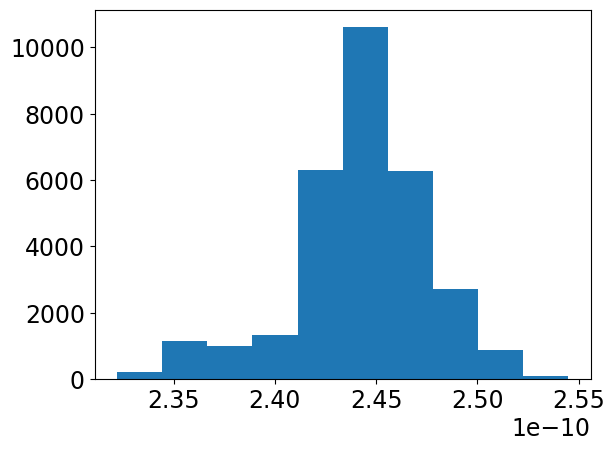

In [10]:
df_reduced = XFEL_BPM.reduceDFbyBPMTrainBunchByIndex(df, bunches=6)
V, M = XFEL_BPM.buildMatrixAndVectorForSVD(df, 'BPMI.1860.TL', coord='Charge', meanSub=False)
meas_Vect, Residual = XFEL_BPM.calcMeasuredPositionAndNResidual(M, V)
_plt.hist(meas_Vect)

In [1]:
twissfile1 = '../../01_mad8/XFEL_Lattice_9/TWISS_T5D'
twissfile2 = '../../01_mad8/XFEL_Lattice_9/TWISS_T4D'

In [3]:
def plotJitterAndNoiseCharge(df, twissfile, trains=None, bunches=None, ex=3.58e-11, ey=3.58e-11, esprd=1e-6, 
                             height_ratios=None, xlim=None,figsize=[14, 12]):
    df_reduced = XFEL_BPM.reduceDFbyBPMTrainBunchByIndex(df, trains=trains, bunches=bunches)
    if xlim:
        df_reduced = df_reduced[df_reduced.S.between(xlim[0], xlim[1])]
    S = df_reduced.S.unique()
    Jitter_Charge, Noise_Charge = XFEL_BPM.calcJitterAndNoise(df_reduced, 'Charge')
    AvgPos, AvgErr = XFEL_BPM.calcAvgPositionAndError(df_reduced, 'Charge')

    twiss = _m8.Output(twissfile)
    twiss.calcBeamSize(ex, ey, esprd)
    df_cut = twiss.data[twiss.data.S.between(min(S), max(S))]
    
    rows_colums = [3, 1]
    fig, ax = XFEL_BPM.plotOptions(figsize=figsize, rows_colums=rows_colums, sharex='all', height_ratios=height_ratios)
    
    _plt.subplot(rows_colums[0], rows_colums[1], 1)
    XFEL_BPM.plot1Curve(S, AvgPos, labelX='$S$ [m]', labelY='Charge [C]', legend=r'$\overline{Charge}$', 
                        ls='+-', color='C0', markersize=15, markeredgewidth=2, ticksType='sci', printLegend=True)
    
    #_plt.subplot(rows_colums[0], rows_colums[1], 2)
    #XFEL_BPM.plot1Curve(S, AvgErr, labelX='$S$ [m]', labelY='Charge [C]', legend=r'$Err_{Charge}$', 
    #                    ls='+-', color='C0', markersize=15, markeredgewidth=2, ticksType='sci', printLegend=True)
    
    _plt.subplot(rows_colums[0], rows_colums[1], 2)
    XFEL_BPM.plot1Curve(S, Jitter_Charge, labelX='$S$ [m]', labelY='Jitter [C]', legend=r'$\sigma_{J,Charge}$', 
                        ls='+-', color='C1', markersize=15, markeredgewidth=2, ticksType='sci', printLegend=True)
    
    _plt.subplot(rows_colums[0], rows_colums[1], 3)
    XFEL_BPM.plot1Curve(S, Noise_Charge, labelX='$S$ [m]', labelY='Noise [C]', legend=r'$\sigma_{N,Charge}$', 
                        ls='+-', color='C2', markersize=15, markeredgewidth=2, ticksType='sci', printLegend=True)
    
    fig.align_labels()
    _m8.Plot.AddMachineLatticeToFigure(fig, twiss)
    _plt.xlim(min([min(S), min(df_cut.S)]) - 2, max([max(S), max(df_cut.S)]) + 2)
    if xlim:
        _plt.xlim(xlim[0], xlim[1])

Mad8.readTwissFile > nrec=8411


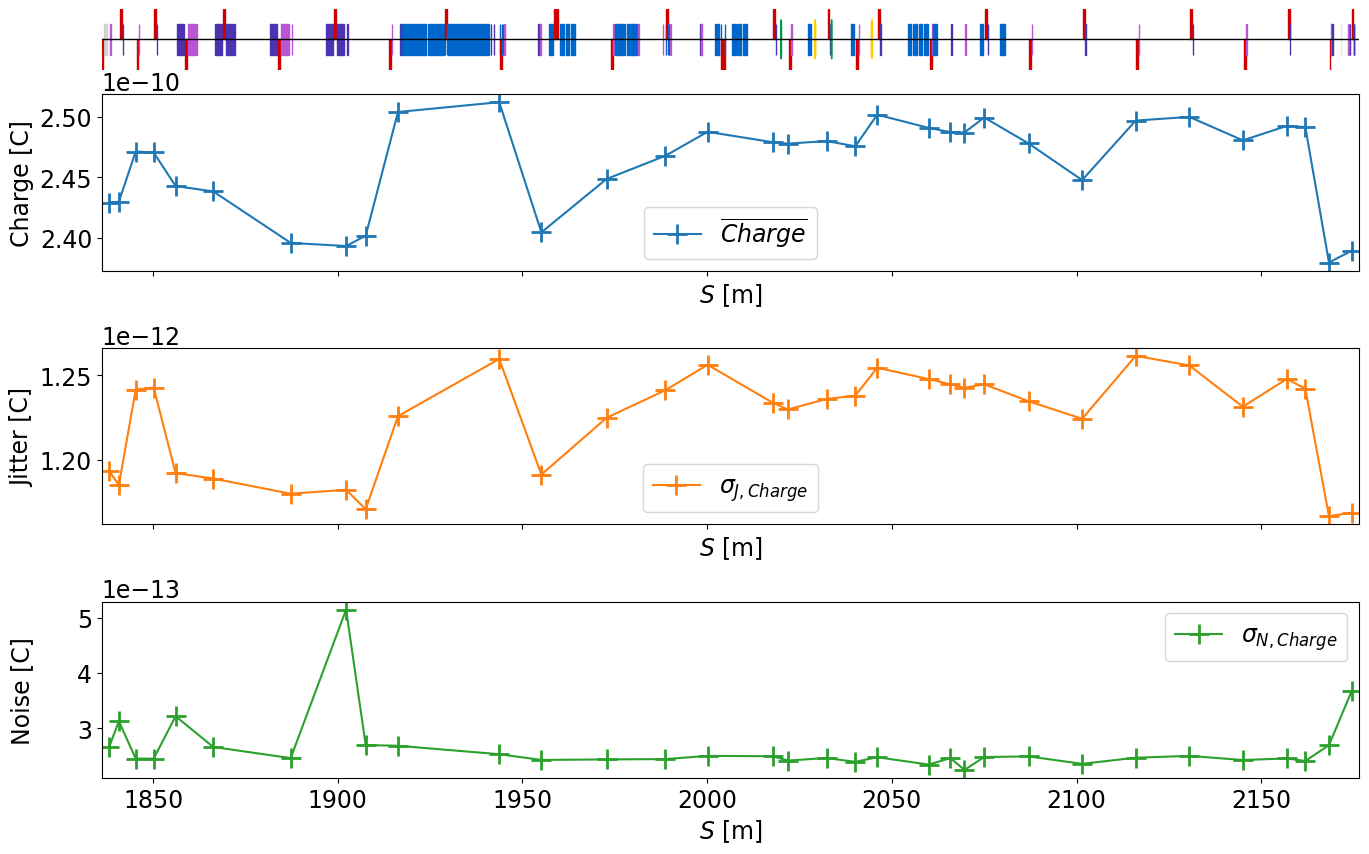

In [10]:
plotJitterAndNoiseCharge(df, twissfile1, bunches=3, figsize=[14, 9])
_plt.savefig("{}_Charge_SVD_T1".format(save_name_prefix), dpi=300, bbox_inches='tight')

Mad8.readTwissFile > nrec=8541


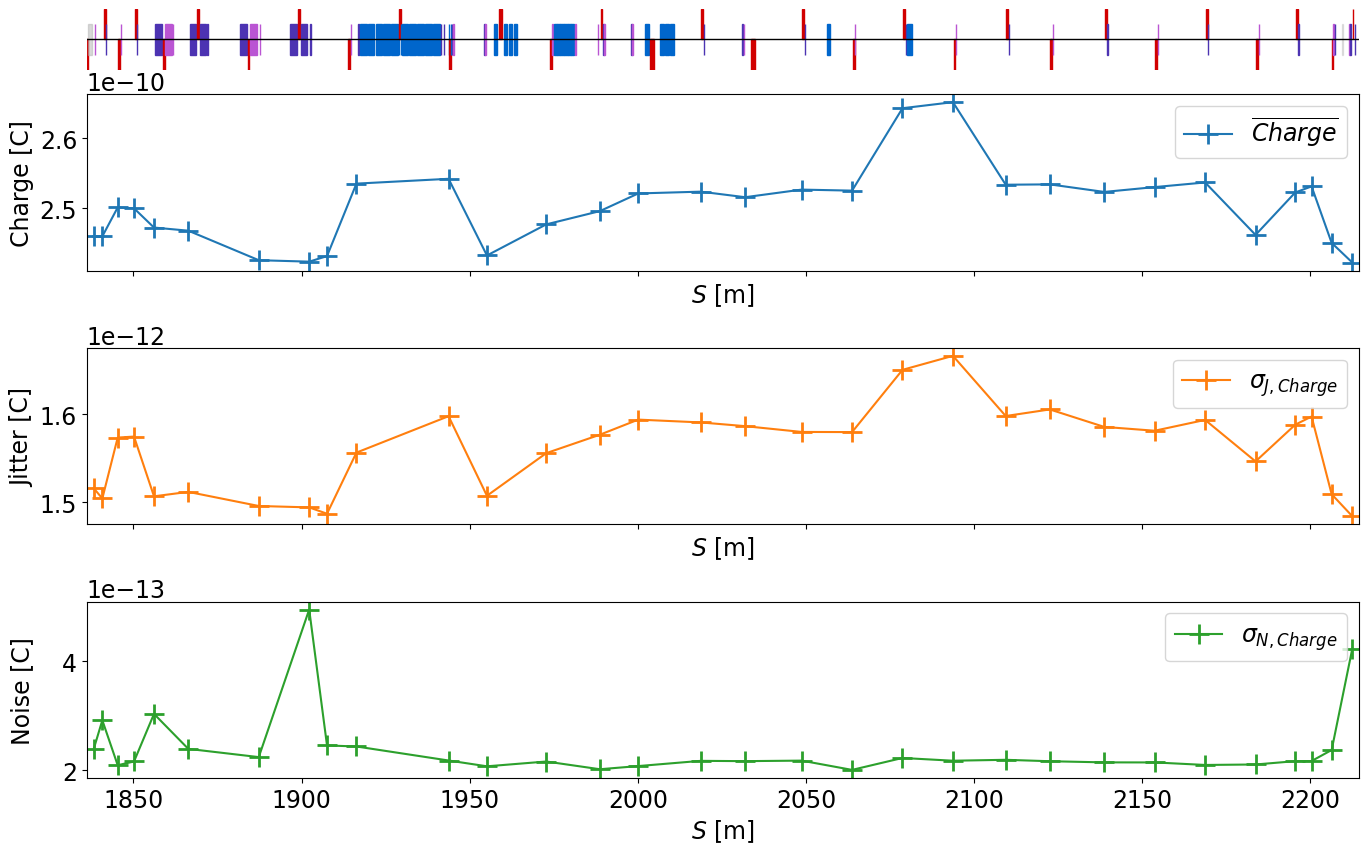

In [11]:
plotJitterAndNoiseCharge(df, twissfile2, bunches=6, figsize=[14, 9])
_plt.savefig("{}_Charge_SVD_T2".format(save_name_prefix), dpi=300, bbox_inches='tight')